# Haleema Sadia

# Task 7 Develop A Neural Network That Can Read Handwriting

# LGMVIP Data Science Internship July

In [1]:
# load libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
# load mnist dataset
tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test= x_test.reshape((x_test.shape[0], 28, 28, 1))

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


## target encoding

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## normalizing the data

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## visualzing the data

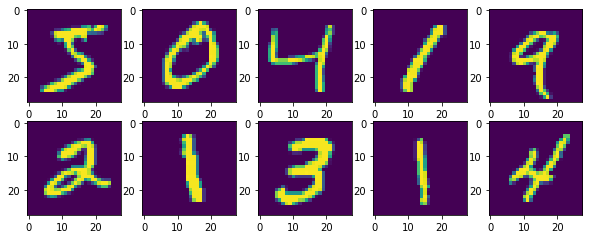

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
plt.show()

## Building the models

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
 # compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


# training the model

In [20]:
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


Epoch 1/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1561 - accuracy: 0.9542 - val_loss: 0.0643 - val_accuracy: 0.9791
Epoch 2/3
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 3/3
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0458 - val_accuracy: 0.9840


## Plotting learning curve

313/313 - 2s - loss: 0.0458 - accuracy: 0.9840


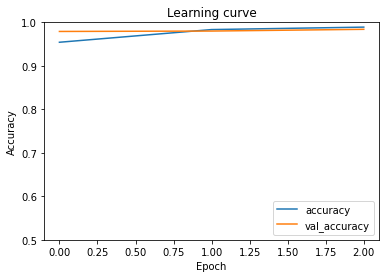

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Learning curve")
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

## test accuracy and test loss

In [23]:
print("Test accuracy: ",test_acc)
print("Test loss: ",test_loss)

Test accuracy:  0.984000027179718
Test loss:  0.045800067484378815
